Epoch 1/10
625/625 [==============================] - 79s 126ms/step - loss: 1.7185 - accuracy: 0.3765 - val_loss: 1.5153 - val_accuracy: 0.4524
Epoch 2/10
625/625 [==============================] - 65s 105ms/step - loss: 1.3218 - accuracy: 0.5274 - val_loss: 1.1978 - val_accuracy: 0.5752
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 1.1456 - accuracy: 0.5936 - val_loss: 1.1442 - val_accuracy: 0.6013
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 1.0128 - accuracy: 0.6475 - val_loss: 1.0704 - val_accuracy: 0.6326
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.9177 - accuracy: 0.6790 - val_loss: 1.0919 - val_accuracy: 0.6214
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.8442 - accuracy: 0.7044 - val_loss: 1.1668 - val_accuracy: 0.6071
Epoch 7/10
625/625 [==============================] - 65s 105ms/step - loss: 0.7725 - accuracy: 0.7303 - val_loss: 0.8884 - val_ac

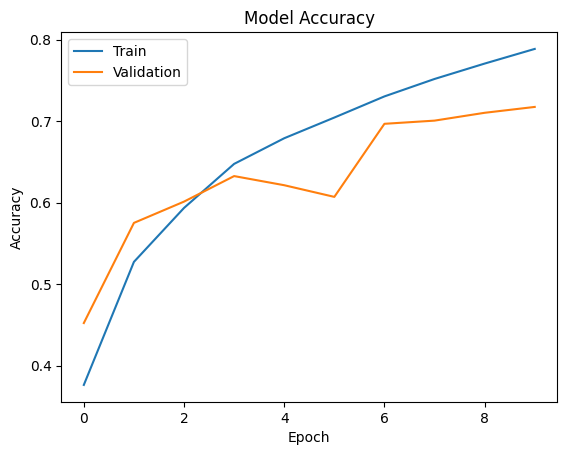

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

# Load the CIFAR-10 dataset and split it into training and testing sets
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values
X_train_full = X_train_full.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to categorical one-hot encoding
y_train_full = np_utils.to_categorical(y_train_full, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Split the training set into training and validation sets
num_train = int(0.8 * len(X_train_full))
X_train, X_val = X_train_full[:num_train], X_train_full[num_train:]
y_train, y_val = y_train_full[:num_train], y_train_full[num_train:]

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Plot the validation and training accuracy graphs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 88ms/step


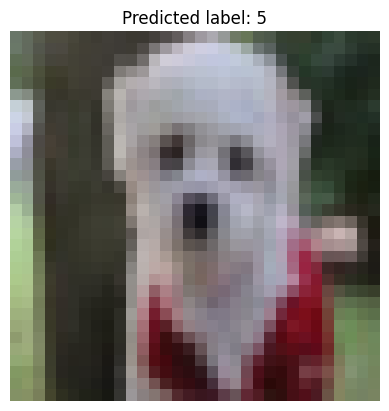

In [5]:
img_idx = np.random.randint(len(X_test))
img = X_test[img_idx]

# Reshape the image to fit the model input shape
img = img.reshape((1, 32, 32, 3))

# Predict the label for the image
pred = model.predict(img)
pred_label = np.argmax(pred)

# Display the image and predicted label
plt.imshow(X_test[img_idx])
plt.title("Predicted label: {}".format(pred_label))
plt.axis('off')
plt.show()

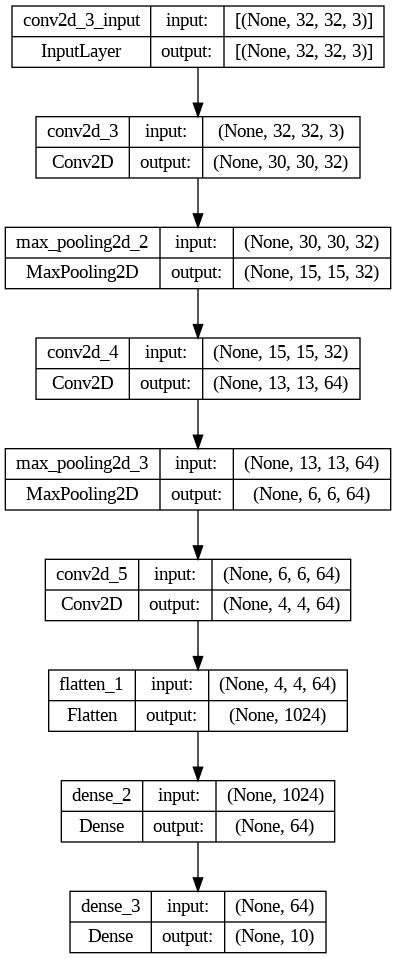

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)
